# Logistic regression

#  EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,KFold
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.drop(columns='User ID')

In [4]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

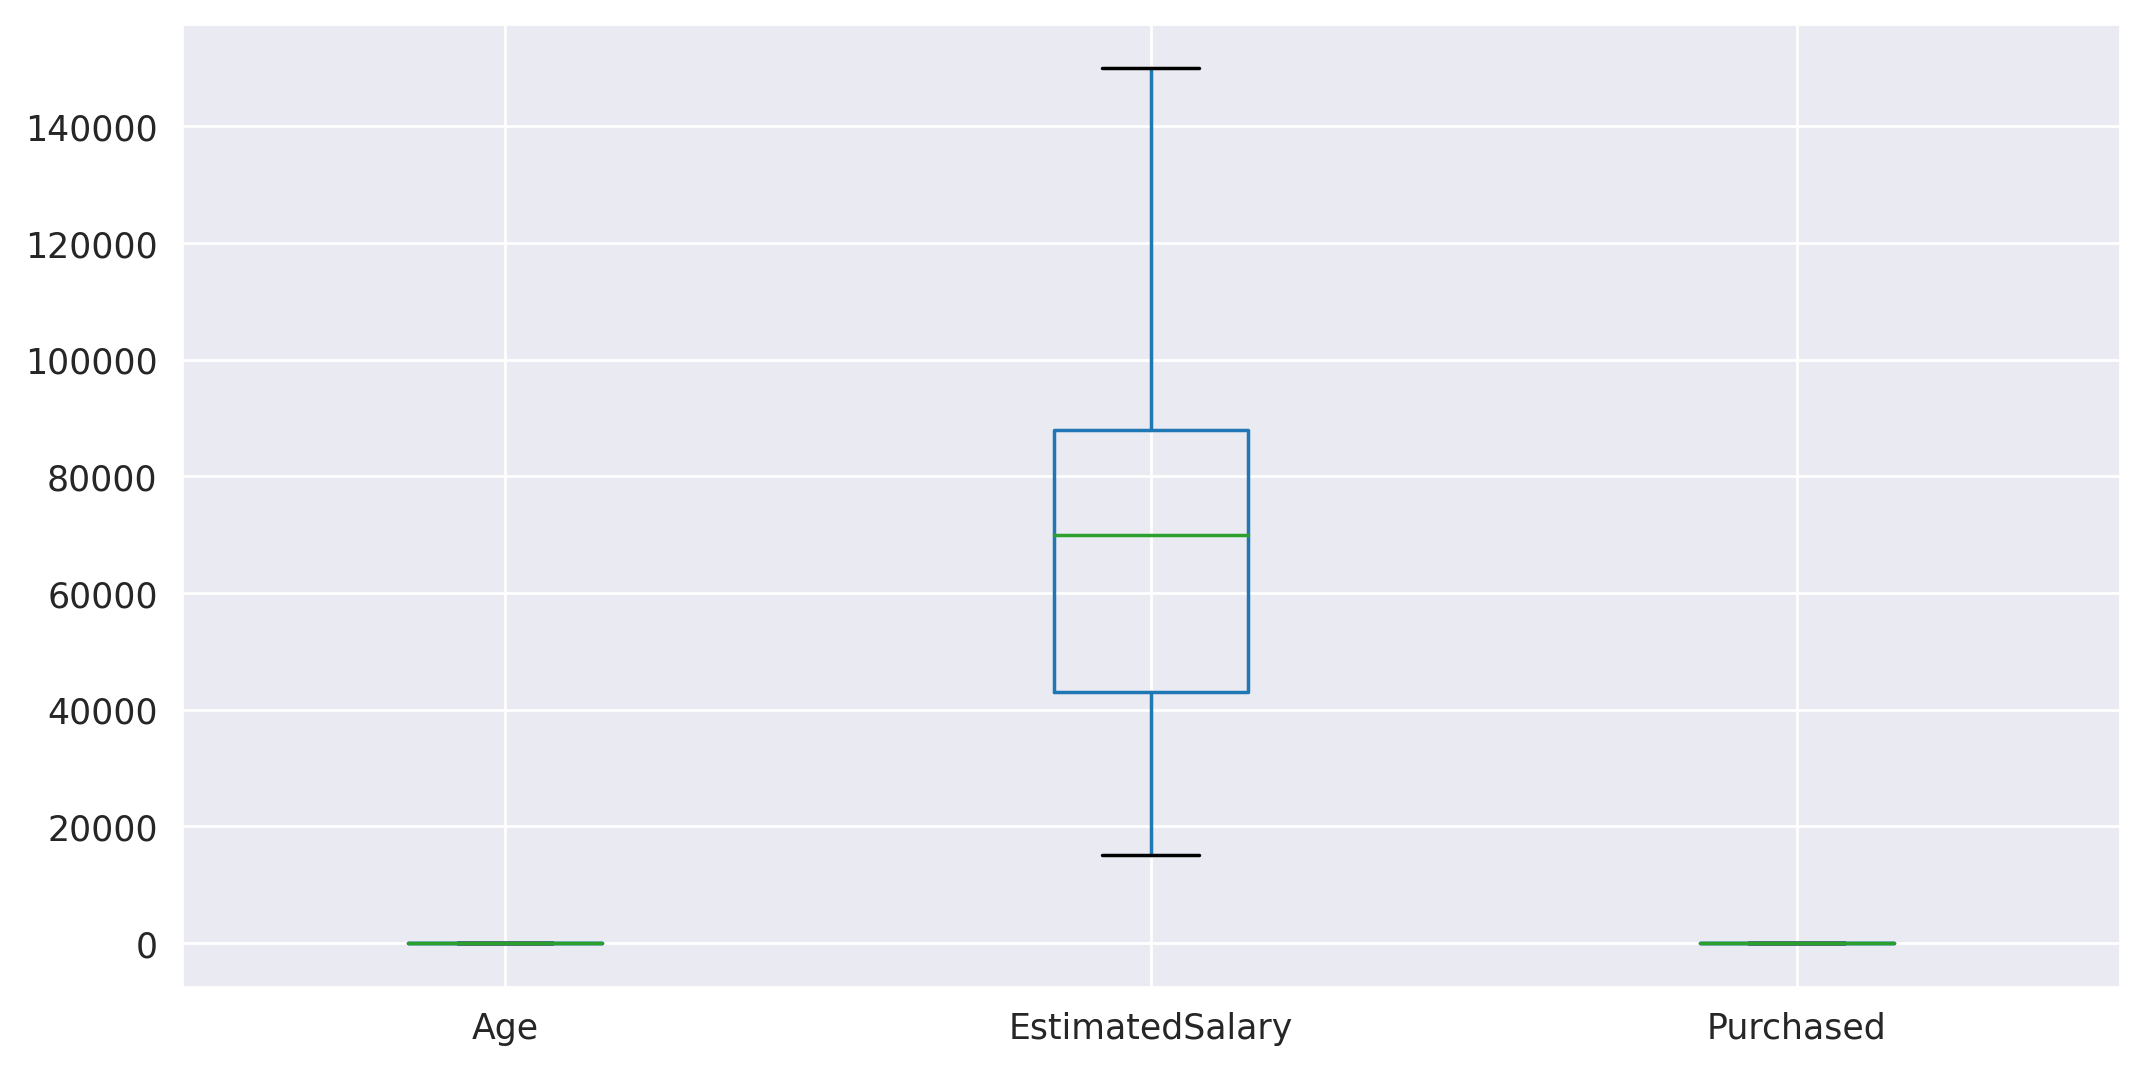

In [5]:
df.boxplot()

In [6]:
df.duplicated().sum()

20

In [7]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Purchased'}>, <Axes: >]], dtype=object)

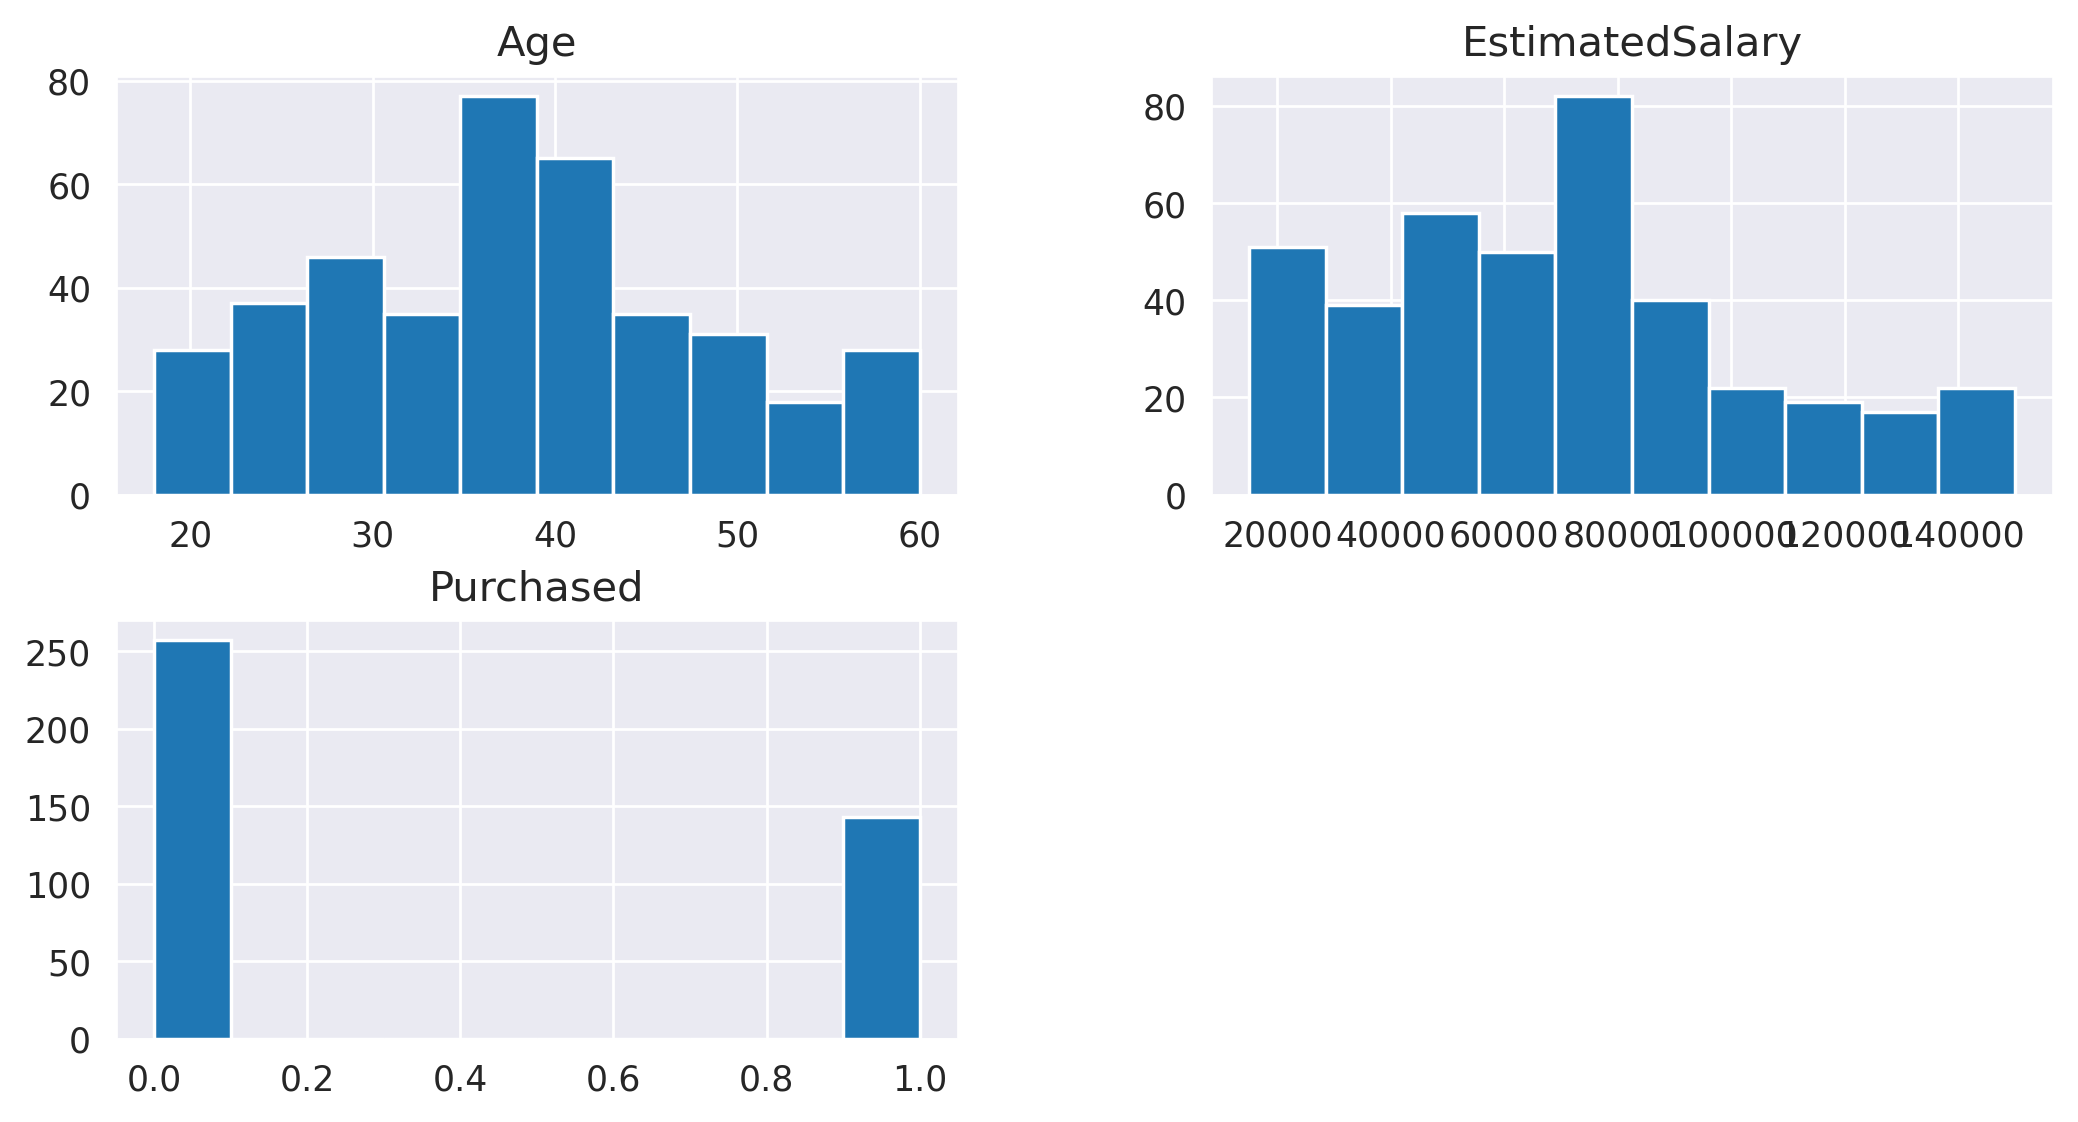

In [8]:
df.hist()

In [9]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [10]:
df['Gender']=df['Gender'].replace({'Male': 0, 'Female': 1})

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [11]:
x=df.iloc[:,:-1]
y=df['Purchased']

In [13]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [15]:
ypred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [16]:
report=classification_report(ytest,ypred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.76      0.81      0.79        32

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80



In [17]:
train_accuracy=lr.score(xtrain,ytrain)
test_accuracy=lr.score(xtest,ytest)

In [18]:
train_accuracy

0.85

In [19]:
test_accuracy

0.825

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
accuracy = accuracy_score(ytest, ypred)

# Output the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.7647058823529411
Recall: 0.8125
F1 Score: 0.787878787878788
Accuracy: 0.825


In [40]:
threshold = 0.5
y_pred_bin = (ypred >= threshold).astype(int)
y_pred=ypred
y_test=ytest
# Confusion Matrix (TP, TN, FP, FN)
TP = np.sum((y_test == 1) & (y_pred_bin == 1))  # True Positives
TN = np.sum((y_test == 0) & (y_pred_bin == 0))  # True Negatives
FP = np.sum((y_test == 0) & (y_pred_bin == 1))  # False Positives
FN = np.sum((y_test == 1) & (y_pred_bin == 0))  # False Negatives

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP) if (TP + FP) != 0 else 0

# Calculate Recall
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Accuracy: 0.825
Precision: 0.7647058823529411
Recall: 0.8125
F1 Score: 0.787878787878788


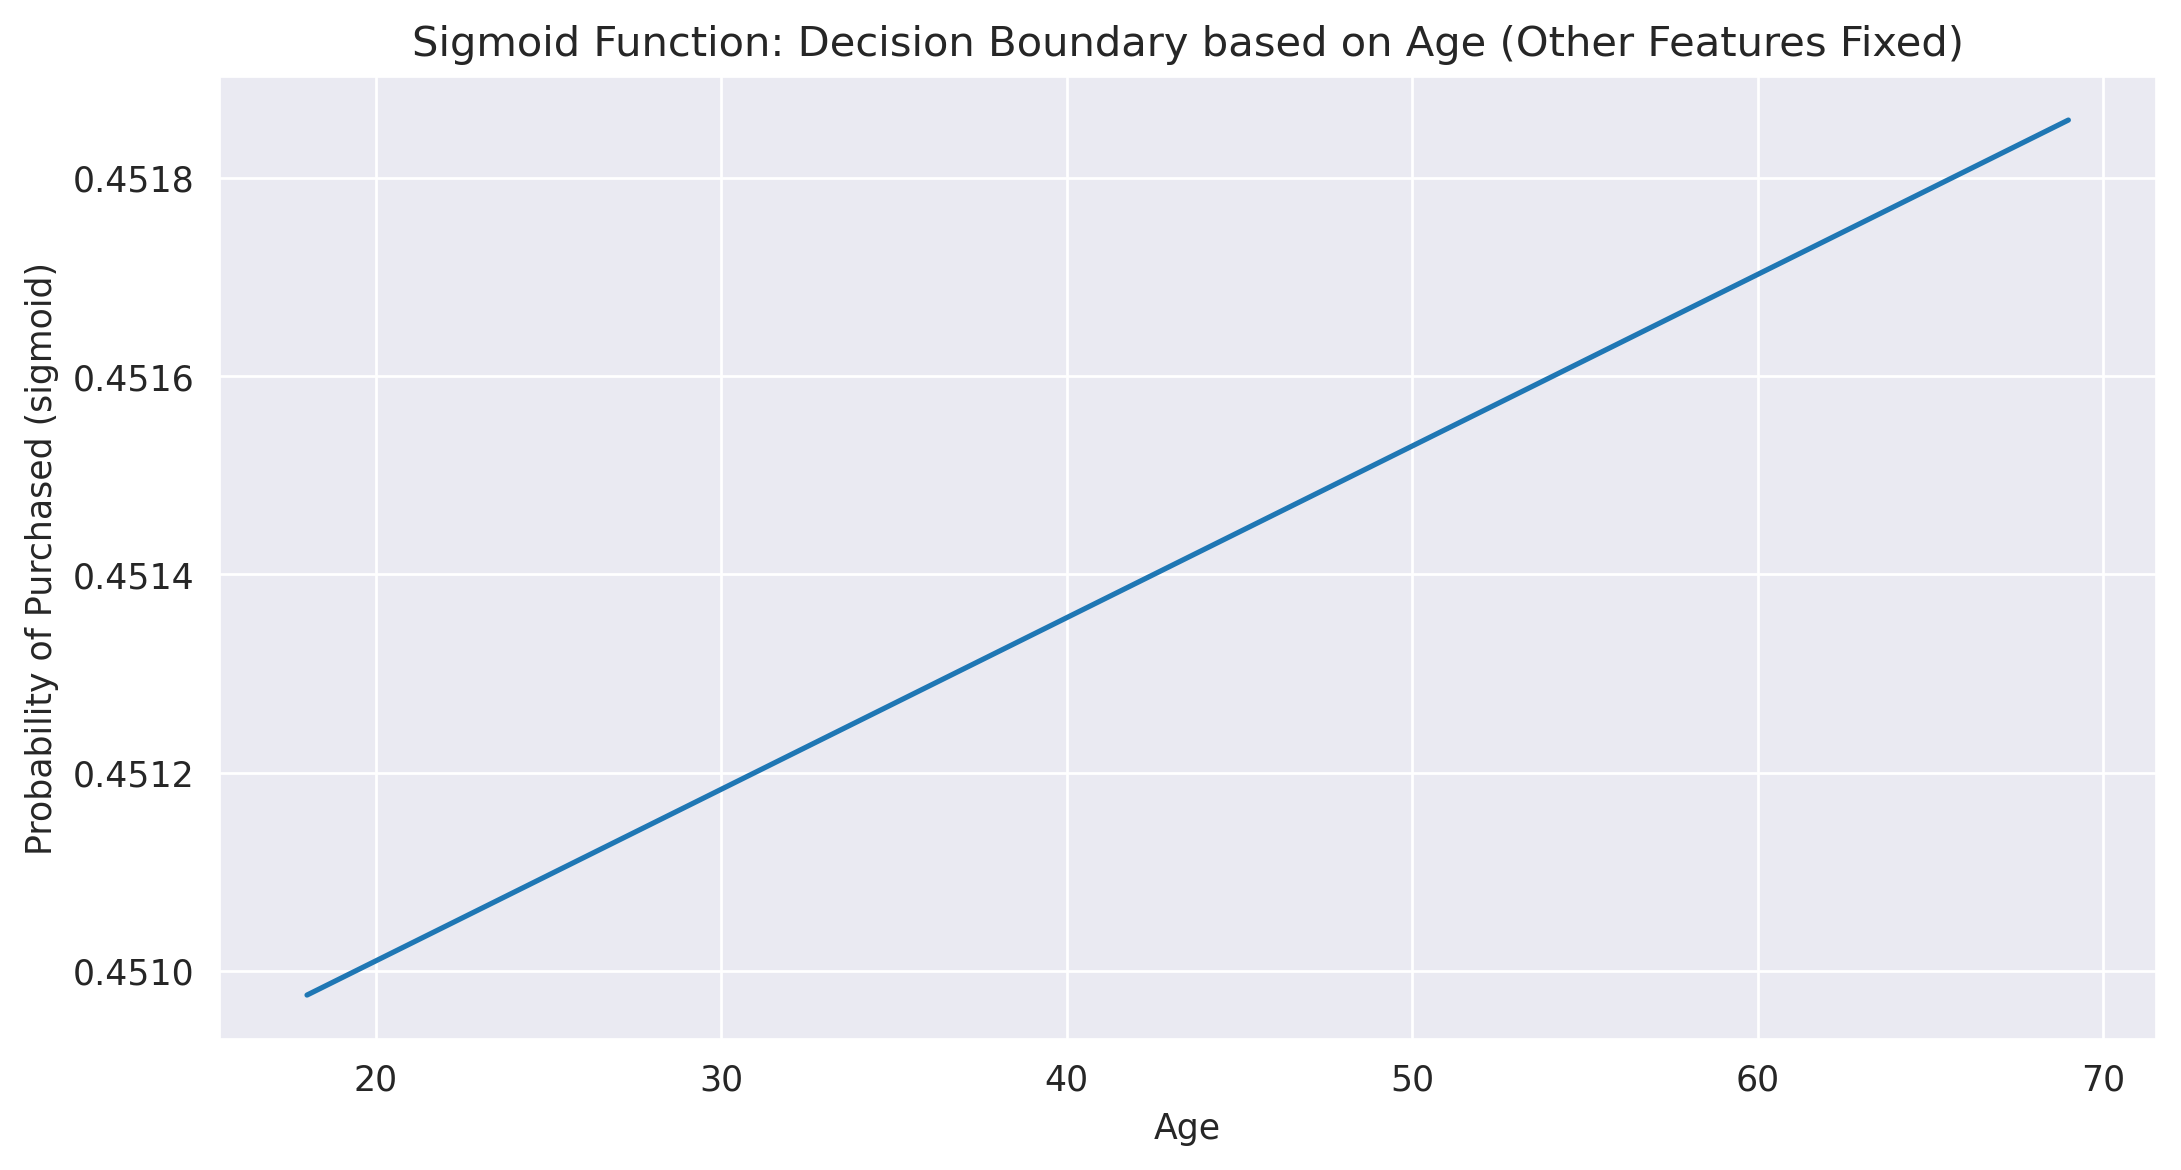

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Example DataFrame (replace this with your actual data)
# You should replace this with the DataFrame containing your data
data = {
    'Gender': np.random.randint(0, 2, 400),  # Random binary values for Gender
    'Age': np.random.randint(18, 70, 400),   # Random Age values between 18 and 70
    'EstimatedSalary': np.random.randint(15000, 120000, 400),  # Random salary values
    'Purchased': np.random.randint(0, 2, 400)  # Random binary target (0 or 1)
}

df = pd.DataFrame(data)

# Features and target variable
X = df.iloc[:, :-1]  # Features: Gender, Age, EstimatedSalary
y = df['Purchased']  # Target variable: Purchased

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

# Train a Logistic Regression model
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

# Get the coefficients (m values) and intercept (c value)
m = lr.coef_[0]  # Coefficients for the features
c = lr.intercept_  # Intercept (bias)

# For plotting, we'll focus on the feature 'Age' and treat other features as constant
# For simplicity, let's assume Gender = 0 and EstimatedSalary = 50000 (midpoint)
constant_values = [0, 50000]  # Gender = 0, EstimatedSalary = 50000

# Calculate z = m_age * Age + m_gender * Gender + m_salary * EstimatedSalary + c
# Here, we calculate for Age only and assume Gender and EstimatedSalary are constants.
x_values = np.linspace(min(df['Age']), max(df['Age']), 400)  # Age range for plotting
z = m[1] * constant_values[0] + m[2] * constant_values[1] + c[0] + m[0] * x_values  # z = m * x + c

# Apply the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y_values = sigmoid(z)

# Plot the sigmoid curve
plt.plot(x_values, y_values)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Probability of Purchased (sigmoid)")
plt.title("Sigmoid Function: Decision Boundary based on Age (Other Features Fixed)")

# Display grid and plot
plt.grid(True)
plt.show()
